<a href="https://colab.research.google.com/github/khanhtran0259/ImageCaptioning/blob/main/ImageCaption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import random
import string
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from PIL import Image
from glob import glob
import cv2 as cv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# cd /content/drive/MyDrive/cv-projetc/imgGen/datasets

In [4]:
# !unzip "/content/drive/MyDrive/cv-projetc/imgGen/datasets/archive.zip" -d "/content/drive/MyDrive/cv-projetc/imgGen/data"

In [10]:
image_path = '/content/drive/MyDrive/cv-projetc/imgGen/data/flickr8k/images/'
caption_path = '/content/drive/MyDrive/cv-projetc/imgGen/data/flickr8k/captions.txt'


In [15]:
images = glob(image_path + "*.jpg")
len(images)


8091

In [57]:
def remove_punctuation(text):
    # Loại bỏ dấu câu từ văn bản
    return text.translate(str.maketrans('', '', string.punctuation))
def read_file_caption(file_path):
  processed_dict = {}

  with open(file_path, 'r') as file:
      lines = file.readlines()

        # Loại bỏ dòng đầu tiên
      lines = lines[1:]

      for line in lines:
            # Loại bỏ dấu xuống dòng và viết thường
          image_name, caption = line.strip().split(',', 1)
          processed_line = caption.strip().lower().replace('\n', '')
          processed_line = remove_punctuation(processed_line)
          # Loại bỏ khoảng trắng từ caption
          processed_line = processed_line.strip()

            # Kiểm tra xem dòng có rỗng không trước khi thêm vào dictionary
          if processed_line:
              if image_name in processed_dict:
                  processed_dict[image_name].append(processed_line)
              else:
                  processed_dict[image_name] = [processed_line]

  return processed_dict

In [58]:
captions = read_file_caption(caption_path)
captions

{'1000268201_693b08cb0e.jpg': ['a child in a pink dress is climbing up a set of stairs in an entry way',
  'a girl going into a wooden building',
  'a little girl climbing into a wooden playhouse',
  'a little girl climbing the stairs to her playhouse',
  'a little girl in a pink dress going into a wooden cabin'],
 '1001773457_577c3a7d70.jpg': ['a black dog and a spotted dog are fighting',
  'a black dog and a tricolored dog playing with each other on the road',
  'a black dog and a white dog with brown spots are staring at each other in the street',
  'two dogs of different breeds looking at each other on the road',
  'two dogs on pavement moving toward each other'],
 '1002674143_1b742ab4b8.jpg': ['a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
  'a little girl is sitting in front of a large painted rainbow',
  'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it',
  'there is a girl with pigta

In [39]:
def generate_vocabulary(file_path):
    vocab = set()
    for caption in captions:
        words = caption.split()
        vocab.update(words)
    return vocab


In [40]:
vocabulary = generate_vocabulary(captions)
vocabulary

{'2474047296fd9179d438jpgelderly',
 '2944362789aebbc22db4jpgkids',
 '319198276188793192edjpga',
 '310334081946de7954a9jpgtwo',
 '2426781076e3f4d2685cjpga',
 '319596953398f5de0fabjpgthe',
 '342696425867a0cee201jpgpeople',
 'photographed',
 'onslaught',
 'driver',
 'painted',
 '3085357792efcf297c71jpgman',
 '3099504809565e17e49djpga',
 '2112774787d43aaee09jpgthe',
 'waterskiis',
 'romantically',
 'length',
 '449287870f17fb825d7jpgyoung',
 '52596888082623392d1jpga',
 'novelty',
 '1663212944a5e68535fjpga',
 'sending',
 '27016030456cbdc4ce7cjpga',
 '2267923837ae88678497jpgchildren',
 '1956678973223cb1b847jpgchildren',
 '697104155c2bfb1058jpgtwo',
 '2413457213f3724a7fcjpgmen',
 '3638908276b1751d30ffjpggirl',
 '34972346326ec740fc1ejpgboys',
 'lime',
 '1285874746486731a954jpgthe',
 'snorkeling',
 'battons',
 '20467787750dd7cac6abjpga',
 '2182488373df73c7cc09jpgpeople',
 'sheperds',
 'veil',
 'strike',
 '3598447435f66cd10bd6jpgthis',
 'handrails',
 '2161723869ac5356daejpga',
 '33234192657fefaa9

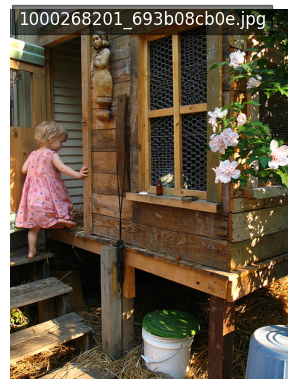

In [48]:
import matplotlib.image as mpimg

def plot_image_with_name(image_path, image_name):
    # Đọc hình ảnh từ đường dẫn
    image = mpimg.imread(image_path + image_name)

    # Vẽ hình ảnh
    plt.imshow(image)

    # Hiển thị tên hình ảnh
    plt.text(10, 20, image_name, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.5))

    # Tắt trục
    plt.axis('off')

    # Hiển thị hình ảnh
    plt.show()

plot_image_with_name(image_path, '1000268201_693b08cb0e.jpg')